# Database 

In [1]:
# Import funct
from aux import *
seed = 2020

Firsly, the dataset is read using Pandas. The file is supposed to be located in ```../dataset/```.

In [2]:
col_names = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
dataset = pd.read_csv('../dataset/wdbc.data', header=None, names= col_names)

Display the first 5 rows of the dataset.

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We separate the diagnosys column and drop the identifier (not a .

In [4]:
X = dataset.drop(['id','diagnosis'], axis=1).sample(frac=1, random_state=seed)
y = dataset['diagnosis'].sample(frac=1, random_state=seed)

We shown the number of Benign and Malign samples.

In [5]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Constants

In [6]:
# Hidden space dimensionality
hidden_space_dim = 2
# Ammount of samples
n_samples = X.shape[0]
# Observed space dimensionality
observed_space_dim = X.shape[1]
# Ammount of classes
n_classes = len(y.unique())
# Hidden layer dimension for Non-linear PCA and VAE
hidden_layer_dim = 150
# Training epochs
num_epochs = 4000
# Learning rate for Adam optimizer
learning_rate = 0.01

# Probabilistic PCA

In [7]:
# create an instance of the P model and the Q model
pca_model = pca(hidden_space_dim, observed_space_dim)
pca_q = Q_pca(hidden_space_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_pca = inf.inference.VI(pca_q, optimizer=optimizer, epochs=num_epochs)

We fit the model using the dataset ```X```.

In [8]:
pca_model.fit({"x": X}, VI_pca)        


 0 epochs	 475709248.0....................
 200 epochs	 466723680.0....................
 400 epochs	 418900576.0....................
 600 epochs	 343387904.0....................
 800 epochs	 273131136.0....................
 1000 epochs	 207689600.0....................
 1200 epochs	 150410496.0....................
 1400 epochs	 105368312.0....................
 1600 epochs	 84043744.0....................
 1800 epochs	 63809828.0....................
 2000 epochs	 48845016.0....................
 2200 epochs	 34344016.0....................
 2400 epochs	 24211256.0....................
 2600 epochs	 17604282.0....................
 2800 epochs	 15399319.0....................
 3000 epochs	 12309299.0....................
 3200 epochs	 9856793.0....................
 3400 epochs	 8245703.0....................
 3600 epochs	 6674848.0....................
 3800 epochs	 5950011.0....................

The evolution of the loss function over the training is:

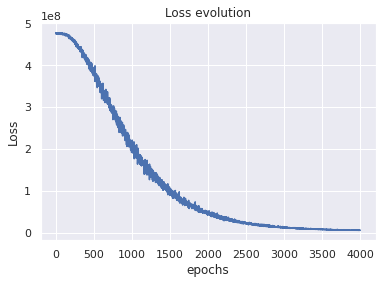

In [9]:
print_loss_function(VI_pca)

We plot the posterior using the learned model and the data.

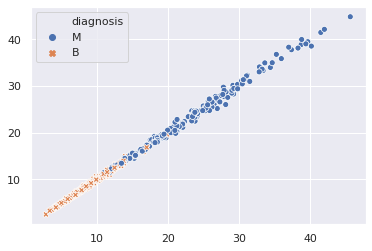

In [10]:
z = pca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

We can obtain the transformation by taking the mean values of ```w``` and ```w0```.

In [11]:
post = pca_model.posterior("w").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [[ 2.2213231e-01  1.8645598e-01  2.6394985e+00  2.3189035e+01
  -3.5051720e-03  1.0810468e-03  2.3975722e-03  4.3499144e-03
  -1.7891037e-03 -3.9391848e-04  2.5416812e-02 -8.9666480e-04
   8.5139595e-02  1.8814723e+00  6.0751028e-03 -3.6317869e-03
   2.6882347e-03  2.4219577e-03  3.8693331e-03  5.7577528e-03
   3.0752474e-01  3.6158428e-01  3.2622545e+00  3.2266167e+01
  -7.6330500e-04  5.6677184e-04  2.2980012e-03  1.1634221e-04
   5.4718344e-03 -3.8324441e-03]
 [ 2.3633751e-01  1.0863244e-01  2.3079250e+00  2.2999321e+01
   1.0867807e-04  3.0759824e-03  1.6160985e-03 -2.5084172e-04
   2.4236443e-03  3.7195061e-03  1.5428679e-02  6.6931010e-04
   9.8524071e-02  2.1417398e+00  8.4250601e-04 -2.5514928e-03
   7.8500353e-04  3.1632483e-03  2.3303055e-03 -9.2254542e-03
   3.2316568e-01  1.8450305e-01  2.9584839e+00  3.2082130e+01
   8.1085507e-04  4.5541834e-05  1.1931337e-02 -6.1534450e-04
   2.2587753e-03  5.8890437e-04]]
Scale: [[0.00859431 0.01014776 0.03609538 0.35439295 0.00680

In [12]:
post = pca_model.posterior("w0").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [ 7.78839254e+00  1.46616840e+01  1.57827778e+01  1.32868614e+01
  9.27879587e-02  6.21381775e-02 -8.83954111e-03 -4.96362057e-03
  1.72304153e-01  6.19576536e-02  6.47915676e-02  1.28807867e+00
  3.82036984e-01 -1.18696966e+01  3.80289811e-03  1.67221893e-02
  1.50041161e-02  1.40503515e-02  1.78105924e-02  3.84358410e-03
  7.37803745e+00  1.70573349e+01  1.39005499e+01  1.68857231e+01
  1.18630916e-01  1.34199291e-01  6.84543774e-02  2.48590447e-02
  2.64056683e-01  7.66163245e-02]
Scale: [0.14673823 0.19096269 0.5309905  1.3712281  0.07559554 0.07809921
 0.073362   0.07319383 0.06600221 0.07311682 0.07679284 0.07259213
 0.08067329 0.33573958 0.06787615 0.06738582 0.07383811 0.07747035
 0.06629187 0.07140287 0.17253205 0.23273891 0.61773586 1.4498857
 0.07050997 0.07124114 0.07627175 0.077457   0.07028009 0.07516493]


# Non-linear PCA

In [13]:
# create an instance of the P model and the Q model
nlpca_model = nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)
nlpca_q = Q_nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_nlpca = inf.inference.VI(nlpca_q, optimizer=optimizer, epochs=num_epochs)

In [14]:
nlpca_model.fit({"x": X}, VI_nlpca)        


 0 epochs	 482973120.0....................
 200 epochs	 153044064.0....................
 400 epochs	 56760700.0....................
 600 epochs	 39244756.0....................
 800 epochs	 27497336.0....................
 1000 epochs	 15773265.0....................
 1200 epochs	 19638594.0....................
 1400 epochs	 13172418.0....................
 1600 epochs	 12827344.0....................
 1800 epochs	 10291819.0....................
 2000 epochs	 7883665.0....................
 2200 epochs	 5927563.0....................
 2400 epochs	 8001964.0....................
 2600 epochs	 5746540.5....................
 2800 epochs	 4448477.5....................
 3000 epochs	 5447167.5....................
 3200 epochs	 4169069.5....................
 3400 epochs	 3520575.75....................
 3600 epochs	 3358960.75....................
 3800 epochs	 2494334.75....................

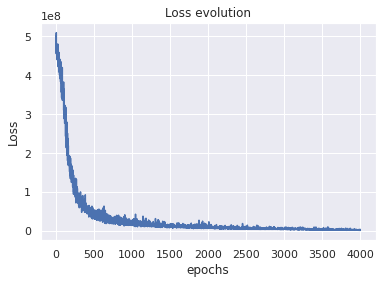

In [15]:
print_loss_function(VI_nlpca)

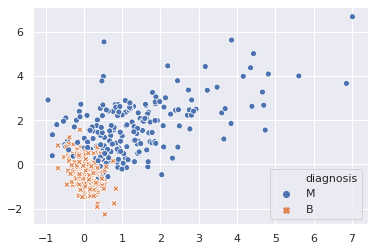

In [16]:
z = nlpca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

# Variational auto-encoder

In [17]:
vae_model = vae(hidden_space_dim, hidden_layer_dim, observed_space_dim)
q_vae = Q_vae(hidden_space_dim , hidden_layer_dim, observed_space_dim)

optimizer = tf.train.AdamOptimizer(learning_rate)
VI_vae = inf.inference.VI(q_vae, optimizer=optimizer, epochs=num_epochs)

In [18]:
vae_model.fit({"x": X}, VI_vae)


 0 epochs	 431589408.0....................
 200 epochs	 4417080.0....................
 400 epochs	 2162451.0....................
 600 epochs	 1708553.5....................
 800 epochs	 1028161.625....................
 1000 epochs	 1014723.9375....................
 1200 epochs	 739125.6875....................
 1400 epochs	 611044.5....................
 1600 epochs	 624193.1875....................
 1800 epochs	 516930.125....................
 2000 epochs	 495662.4375....................
 2200 epochs	 470558.96875....................
 2400 epochs	 9177594.0....................
 2600 epochs	 393088.21875....................
 2800 epochs	 397580.875....................
 3000 epochs	 349866.4375....................
 3200 epochs	 337188.03125....................
 3400 epochs	 310745.0625....................
 3600 epochs	 298454.46875....................
 3800 epochs	 283784.90625....................

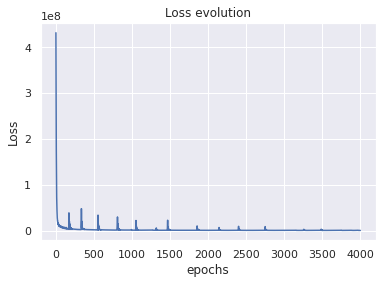

In [19]:
print_loss_function(VI_vae)

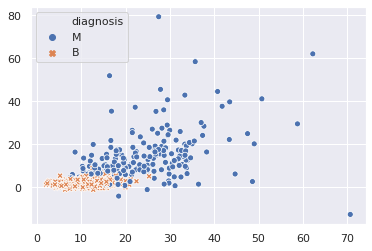

In [20]:
z = vae_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)